### Velocidades

In [124]:
#Primero se importan las librerias necesarias.
import astropy.io.fits as fits 
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

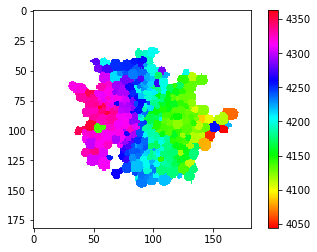

In [125]:
#Visualización de la imagen.
hdu = fits.open("ugc4555_rv_voro.fits")
velmap = hdu[0].data
plt.imshow(velmap,cmap="hsv",interpolation=None)
plt.colorbar()
header = hdu[0].header


In [167]:
Dx = header['NAXIS1']# se definen los arraglos deacuerdo a la dimension de la imagen.

In [168]:
Dy = header['NAXIS2']

In [169]:
x =np.arange(Dx)

In [170]:
y =np.arange(Dy)

In [171]:
yy,xx = np.meshgrid(x,y)

In [172]:
xc,yc = Dx/2,Dy/2

In [173]:
R = np.sqrt((xx-xc)**2 + (yy-yc)**2)

/home/cesar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/cesar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


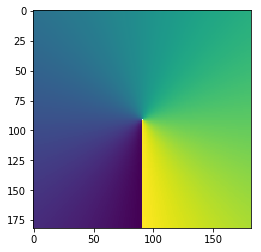

In [174]:
#Ajuste de inclinacion Psi
Psi = np.arctan((yy-yc)/(xx-xc))
Psi = np.rad2deg(Psi) + 90
Psi[int(xc):,:] = Psi[int(xc):,:]+180
Psi = -Psi+270
Psi[int(xc):,int(yc):] = Psi[int(xc):,int(yc):]+360
plt.imshow(Psi,interpolation=None)

 # Se define el parametro $\alpha$ para obtener $r$

In [177]:
alpha= np.sqrt((np.cos(np.deg2rad(Psi-90))**2)+ np.sin(np.deg2rad(Psi-90))**2 / np.cos(np.deg2rad(38)))

In [178]:
r=alpha*R

In [179]:
theta = np.arccos(R * np.cos(np.deg2rad(Psi -90))/(r))

In [180]:
vcir = (velmap-4235)*alpha/(np.sin(np.deg2rad(38))*np.cos(np.deg2rad(Psi-90)))

## Grafica de vcir en funcion de r

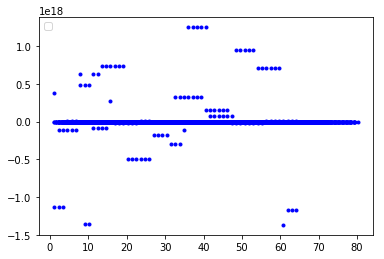

In [181]:
plt.plot(r, vcir, 'b.', linewidth = 0.5)
plt.legend( (''), loc = 'upper left')
plt.show()

In [ ]:
#Ajuste de rango para valores representativos

In [182]:
mask = (abs(vcir)>300)
vcir[mask] = np.nan

/home/cesar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


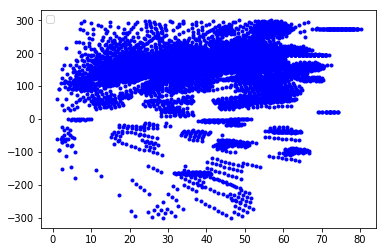

In [183]:
R = R[~np.isnan(vcir)]
r = r[~np.isnan(vcir)]
vcir = vcir[~np.isnan(vcir)]
plt.plot(r, vcir, 'b.', linewidth = 0.5)
plt.legend( (''), loc = 'upper left')
plt.show()

Text(0,0.5,'$vcir [km/s]$')

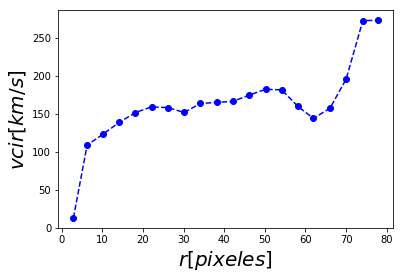

In [185]:
bins = 20
A = np.zeros(bins)
B = np.zeros(bins)
for i in range (0,bins):
    mask = ((i*max(r)/bins)<r)*(r<(i+1)*max(r)/bins)
    A[i] = np.median(vcir[mask])
    B[i] = np.mean(r[mask])
plt.plot(B,A,'bo--')
plt.xlabel(r'$r [pixeles]$', fontsize=20)
plt.ylabel(r'$vcir [km/s]$', fontsize=20)